In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering

In [4]:
zooData = pd.read_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/zoo.csv')

In [5]:
zooData.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zooData.shape

(101, 18)

In [7]:
zooData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<AxesSubplot:>

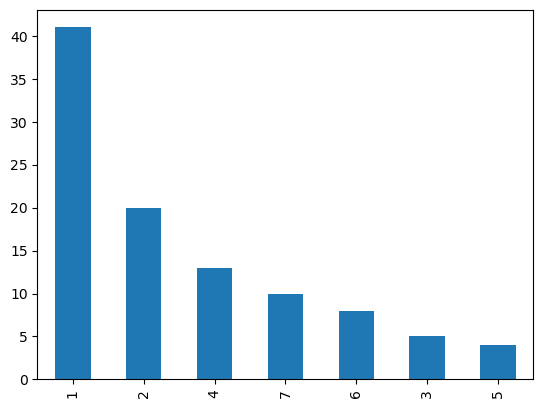

In [8]:
zooData['class_type'].value_counts().plot(kind='bar')

In [9]:
#check the scale 
'''
Note :- whenever the distance measure is involved we need to check the scale first, as each feature might be scaled 
differently, so we need to generalise it
'''
zooData.describe().round(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.00,101.0,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00
mean,0.43,0.2,0.58,0.41,0.24,0.36,0.55,0.60,0.82,0.79,0.08,0.17,2.84,0.74,0.13,0.44,2.83
std,0.50,0.4,0.50,0.49,0.43,0.48,0.50,0.49,0.38,0.41,0.27,0.38,2.03,0.44,0.34,0.50,2.10
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,1.00
50%,0.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,0.00,2.00
75%,1.00,0.0,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,4.00
max,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.00,1.00,1.00,1.00,7.00


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
zooData['legs'] = scaler.fit_transform(zooData[['legs']])

In [12]:
zooData.describe().round(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.00,101.0,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00
mean,0.43,0.2,0.58,0.41,0.24,0.36,0.55,0.60,0.82,0.79,0.08,0.17,0.36,0.74,0.13,0.44,2.83
std,0.50,0.4,0.50,0.49,0.43,0.48,0.50,0.49,0.38,0.41,0.27,0.38,0.25,0.44,0.34,0.50,2.10
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.25,0.00,0.00,0.00,1.00
50%,0.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.50,1.00,0.00,0.00,2.00
75%,1.00,0.0,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.50,1.00,0.00,1.00,4.00
max,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.00


In [13]:
#we need to drop the animal name --> clusetreing will be done based on other features and class_type --> as class type is target variable
zooData = zooData.drop(columns=['animal_name','class_type'],axis=1)

In [14]:
agm = AgglomerativeClustering(n_clusters=5)
agm.fit(zooData)

AgglomerativeClustering(n_clusters=5)

In [15]:
#Extract the Label info for each observation
label = agm.labels_
label

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 0, 0, 0, 3, 1, 2, 1, 3, 3,
       1, 3, 4, 0, 0, 1, 1, 1, 4, 1, 1, 3, 2, 1, 1, 3, 2, 4, 4, 3, 4, 3,
       1, 1, 0, 1, 1, 1, 1, 4, 0, 0, 1, 1, 3, 3, 3, 3, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 0, 4, 2, 3, 1, 0, 2, 3,
       4, 0, 3, 0, 2, 1, 1, 3, 1, 4, 1, 4, 3])

In [16]:
zooData['cluster_number'] = label
zooData.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,cluster_number
0,1,0,0,1,0,0,1,1,1,1,0,0,0.5,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,0.5,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0.0,1,0,0,2
3,1,0,0,1,0,0,1,1,1,1,0,0,0.5,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,0.5,1,0,1,1


In [17]:
#now we will get the hieracrchical clustering using the linkage and dendrogrm clustering
from scipy.cluster.hierarchy import dendrogram , linkage 

In [22]:
link = linkage(zooData,'average')

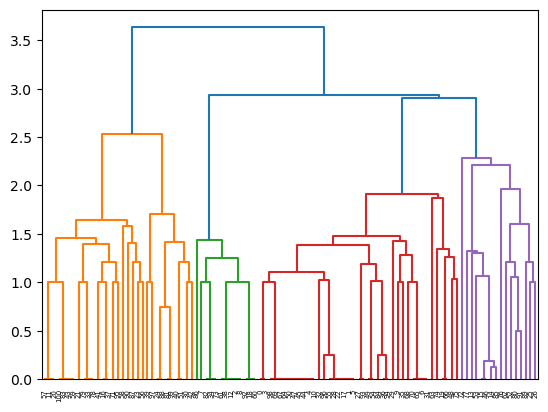

In [24]:
#p --> number of the clusters we would like 
dend = dendrogram(link,p=4)

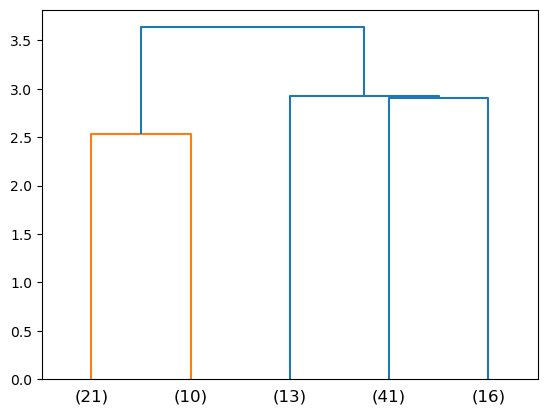

In [26]:
dend = dendrogram(link,p=5,truncate_mode='lastp') #all the sum will be equal to total observations